In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# dataset = tf.keras.preprocessing.image_dataset_from_directory(
        
# )
train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        'PlantVillage',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse",
#         save_to_dir="C:\\Code\\potato-disease-classification\\training\\AugmentedImages"
)

Found 18962 images belonging to 14 classes.


In [5]:
train_generator.class_indices

{'Pepper__bell___Bacterial_spot': 0,
 'Pepper__bell___healthy': 1,
 'Potato___Early_blight': 2,
 'Potato___Late_blight': 3,
 'Potato___healthy': 4,
 'Tomato_Bacterial_spot': 5,
 'Tomato_Early_blight': 6,
 'Tomato_Late_blight': 7,
 'Tomato_Leaf_Mold': 8,
 'Tomato_Septoria_leaf_spot': 9,
 'Tomato__Target_Spot': 10,
 'Tomato__Tomato_YellowLeaf__Curl_Virus': 11,
 'Tomato__Tomato_mosaic_virus': 12,
 'Tomato_healthy': 13}

In [6]:
class_names = list(train_generator.class_indices.keys())
class_names

['Pepper__bell___Bacterial_spot',
 'Pepper__bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

In [7]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
validation_generator = validation_datagen.flow_from_directory(
        'PlantVillage',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 18962 images belonging to 14 classes.


In [8]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        'PlantVillage',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 18962 images belonging to 14 classes.


In [9]:
for image_batch, label_batch in test_generator:
    print(image_batch[0])
    break

[[[0.7184939  0.68712133 0.76947427]
  [0.7339514  0.70257884 0.7849318 ]
  [0.6755875  0.6442149  0.72656786]
  ...
  [0.7352402  0.68425983 0.7626912 ]
  [0.72899425 0.67801386 0.7564452 ]
  [0.7283609  0.67738044 0.75581187]]

 [[0.7108929  0.67952037 0.7618733 ]
  [0.7459863  0.71461374 0.7969667 ]
  [0.6774878  0.6461152  0.7284682 ]
  ...
  [0.7257576  0.6747772  0.7532086 ]
  [0.72841865 0.67743826 0.7558696 ]
  [0.73348594 0.68250555 0.760937  ]]

 [[0.7043713  0.6729987  0.75535166]
  [0.74973285 0.7183603  0.80071324]
  [0.6844896  0.65311706 0.73547   ]
  ...
  [0.7543119  0.70333153 0.7817629 ]
  [0.7540318  0.7030514  0.78148276]
  [0.748331   0.6973506  0.775782  ]]

 ...

 [[0.62796974 0.5691462  0.6593423 ]
  [0.6381043  0.5792808  0.66947687]
  [0.64792013 0.5890966  0.6792927 ]
  ...
  [0.3853032  0.3107934  0.3970679 ]
  [0.53689796 0.4623881  0.54866266]
  [0.6303651  0.5558553  0.6421298 ]]

 [[0.68696886 0.62814534 0.7183414 ]
  [0.6964701  0.6376465  0.7278426 ]


## Building the Model

In [10]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 14

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 64)       0

In [12]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [14]:
history = model.fit(
    train_generator,
    steps_per_epoch=47,
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=6,
    verbose=1,
    epochs=50,
)

Epoch 1/50
47/47 [==============================] - 238s 5s/step - loss: 2.4259 - accuracy: 0.1709 - val_loss: 2.4301 - val_accuracy: 0.2031
Epoch 2/50
47/47 [==============================] - 245s 5s/step - loss: 2.2137 - accuracy: 0.2553 - val_loss: 2.2506 - val_accuracy: 0.2500
Epoch 3/50
47/47 [==============================] - 254s 5s/step - loss: 2.0316 - accuracy: 0.3322 - val_loss: 1.9069 - val_accuracy: 0.3854
Epoch 4/50
47/47 [==============================] - 245s 5s/step - loss: 1.7985 - accuracy: 0.4188 - val_loss: 1.6943 - val_accuracy: 0.4062
Epoch 5/50
47/47 [==============================] - 244s 5s/step - loss: 1.5726 - accuracy: 0.4787 - val_loss: 1.6491 - val_accuracy: 0.4062
Epoch 6/50
47/47 [==============================] - 255s 5s/step - loss: 1.4372 - accuracy: 0.5286 - val_loss: 1.4944 - val_accuracy: 0.5052
Epoch 7/50
47/47 [==============================] - 255s 5s/step - loss: 1.2983 - accuracy: 0.5691 - val_loss: 1.1669 - val_accuracy: 0.5885
Epoch 8/50
47

In [15]:
scores = model.evaluate(test_generator)

593/593 [==============================] - 763s 1s/step - loss: 0.2845 - accuracy: 0.9015


# Accuracy and Loss Curves

In [16]:
history

In [17]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 47}

In [18]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [19]:
type(history.history['loss'])
len(history.history['loss'])

50

In [20]:
history.history['loss'][:5]

[2.4259188175201416,
 2.2137441635131836,
 2.031646966934204,
 1.7985438108444214,
 1.572643518447876]

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [22]:
val_acc

[0.203125,
 0.25,
 0.3854166567325592,
 0.40625,
 0.40625,
 0.5052083134651184,
 0.5885416865348816,
 0.546875,
 0.6041666865348816,
 0.6875,
 0.7083333134651184,
 0.6614583134651184,
 0.7291666865348816,
 0.765625,
 0.7135416865348816,
 0.7291666865348816,
 0.8177083134651184,
 0.7239583134651184,
 0.796875,
 0.8177083134651184,
 0.78125,
 0.8020833134651184,
 0.8385416865348816,
 0.7864583134651184,
 0.8802083134651184,
 0.859375,
 0.8645833134651184,
 0.765625,
 0.8229166865348816,
 0.859375,
 0.8802083134651184,
 0.7552083134651184,
 0.8802083134651184,
 0.8541666865348816,
 0.9010416865348816,
 0.8854166865348816,
 0.875,
 0.9010416865348816,
 0.90625,
 0.8958333134651184,
 0.8541666865348816,
 0.8958333134651184,
 0.859375,
 0.9010416865348816,
 0.9114583134651184,
 0.8958333134651184,
 0.9270833134651184,
 0.8385416865348816,
 0.859375,
 0.9427083134651184]

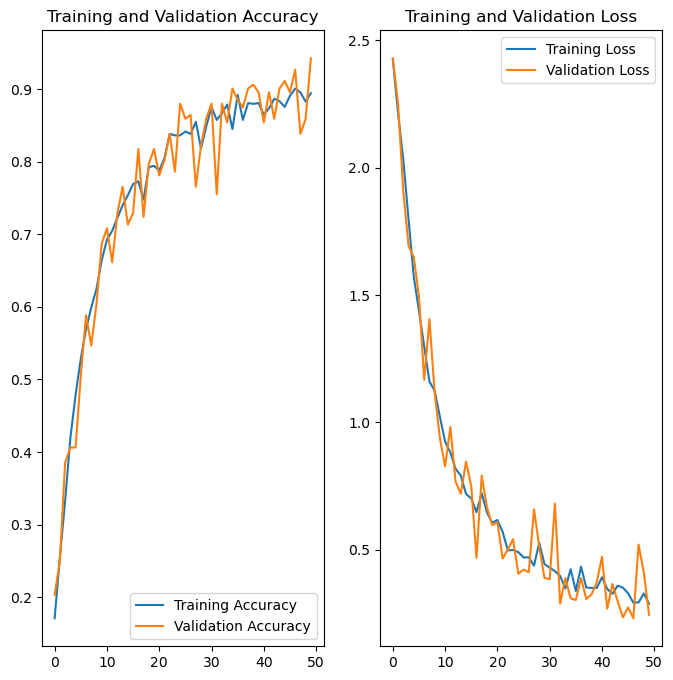

In [23]:
EPOCHS = 50

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Run prediction on a sample image

In [24]:
import numpy as np

First image to predict
Actual label: Tomato_Leaf_Mold
1/1 [==============================] - 1s 858ms/step
Predicted label: Tomato_Leaf_Mold


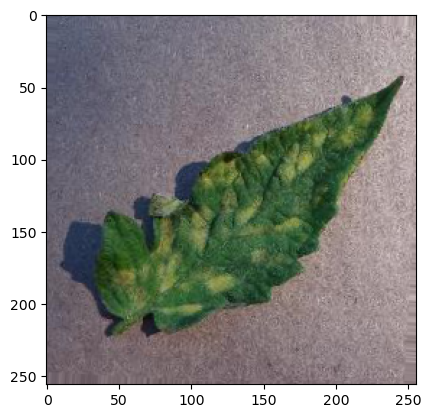

In [34]:
for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])
    
    print("First image to predict")
    plt.imshow(first_image)
    print("Actual label:",class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("Predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break

In [35]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 61ms/step


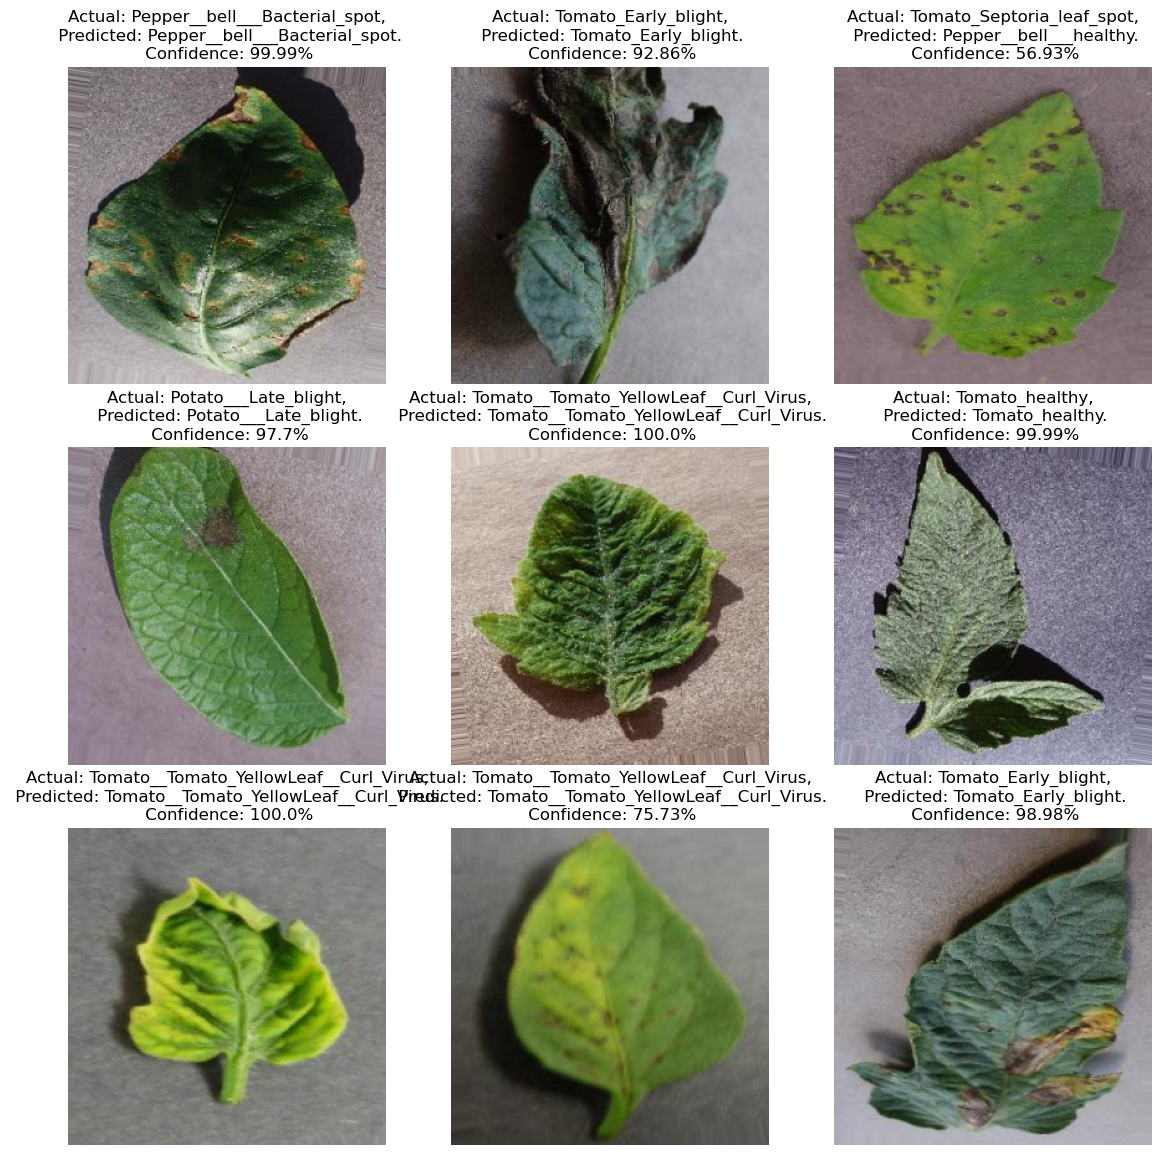

In [38]:
plt.figure(figsize=(14, 14))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

# Saving the Model

In [39]:
model_version=3

In [40]:
model.save(f"../models/version_{model_version}.h5")